# Timeseries

In [75]:
from datetime import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import *
from datetime import datetime, timedelta
from collections import defaultdict


Legggiamo i file e creiamo liste o dizionari

In [76]:
all_reading = []
all_readings = []
with open('Measurement_summary.csv') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            parts = line.split('"')
            first_part = parts[0].rstrip(',')
            second_part = parts[1]
            third_part = parts[2]
            third_part_good = third_part.strip(',')

            date, code = first_part.split(',', 1)
            #date = datetime.strptime(date_str + ':00', '%Y-%m-%d %H:%M:%S')
            address = second_part
            latitude, longitude, SO2, NO2, O3, CO, PM10, PM25 = third_part_good.split(',', 7)

            code = int(code)
            latitude = float(latitude)
            longitude = float(longitude)
            SO2 = float(SO2)
            NO2 = float(NO2)
            O3 = float(O3)
            CO = float(CO)
            PM10 = float(PM10)
            PM25 = float(PM25)

            row = {
                'date': date,
                'code': code,
                'address': address,
                'latitude': latitude,
                'longitude': longitude,
                'SO2': SO2,
                'NO2': NO2,
                'O3': O3,
                'CO': CO,
                'PM10': PM10,
                'PM2.5': PM25
            }
            
            all_reading.append(row)

# Ordina le righe per data
all_reading.sort(key=lambda x: x['date'])
for reading in all_reading:
    all_readings.append([
        reading['date'],
        reading['code'],
        reading['address'],
        reading['latitude'],
        reading['longitude'],
        reading['SO2'],
        reading['NO2'],
        reading['O3'],
        reading['CO'],
        reading['PM10'],
        reading['PM2.5']
    ])


print(all_readings[:5])  # Stampa le prime 5 letture per verifica



item_ranges = {}
with open('Measurement_item_info.csv') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            parts = line.split(',')
            item_code = parts[0]
            item_name = parts[1]
            unit = parts[2]
            good = parts[3]
            normal = parts[4]
            bad = parts[5]
            very_bad = parts[6]


            item_code = int(item_code)
            good = float(good)
            normal = float(normal)
            bad = float(bad)
            very_bad = float(very_bad)

            item_ranges[item_name] = {
                'item_code': item_code,
                'unit': unit,
                'good': good,
                'normal': normal,
                'bad': bad,
                'very_bad': very_bad
            }


print(item_ranges) 

[['2017-01-01 00:00', 101, '19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea', 37.5720164, 127.0050075, 0.004, 0.059, 0.002, 1.2, 73.0, 57.0], ['2017-01-01 00:00', 102, '15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea', 37.5642629, 126.9746757, 0.006, 0.068, 0.002, 1.3, 77.0, 63.0], ['2017-01-01 00:00', 103, '136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea', 37.54003270000001, 127.00485, 0.005, 0.039, 0.002, 1.4, 70.0, 68.0], ['2017-01-01 00:00', 104, '215, Jinheung-ro, Eunpyeong-gu, Seoul, Republic of Korea', 37.6098232, 126.9348476, 0.005, 0.045, 0.003, 0.6, 73.0, 46.0], ['2017-01-01 00:00', 105, '32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul, Republic of Korea', 37.5937421, 126.9496787, 0.005, 0.044, 0.004, 1.0, 81.0, 44.0]]
{'SO2': {'item_code': 1, 'unit': 'ppm', 'good': 0.02, 'normal': 0.05, 'bad': 0.15, 'very_bad': 1.0}, 'NO2': {'item_code': 3, 'unit': 'ppm', 'good': 0.03, 'normal': 0.06, 'bad': 0.2, 'very_bad': 2.0}, 'CO': {'item_code': 5, 'unit': 'ppm', '

Creiamo un df per andare a raggruppare i valori sulla base della data

In [78]:
dati_totali = {
    'date': [],
    'SO2': [],
    'NO2': [],
    'O3': [],
    'CO': [],
    'PM10': [],
    'PM2.5': []
}

for reading in all_readings:
    dati_totali['date'].append(reading[0])
    dati_totali['SO2'].append(reading[5])
    dati_totali['NO2'].append(reading[6])
    dati_totali['O3'].append(reading[7])
    dati_totali['CO'].append(reading[8])
    dati_totali['PM10'].append(reading[9])
    dati_totali['PM2.5'].append(reading[10])


df = pd.DataFrame(dati_totali)
#print(df.head())  # Stampa le prime 5 righe del DataFrame per verifica

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')



df['date_hour'] = df['date'].dt.floor('h')
df_grouped = df.groupby('date_hour').mean().reset_index()
df_grouped.head()



,date_hour,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,2017-01-01 00:00:00,0.00532,0.05076,0.00248,1.148,73.08,51.92
1,2017-01-01 01:00:00,2017-01-01 01:00:00,0.00512,0.04928,0.00256,1.148,69.92,53.12
2,2017-01-01 02:00:00,2017-01-01 02:00:00,0.00488,0.04752,0.00244,1.132,69.96,51.16
3,2017-01-01 03:00:00,2017-01-01 03:00:00,0.00468,0.04444,0.00244,1.084,69.68,49.96
4,2017-01-01 04:00:00,2017-01-01 04:00:00,0.00452,0.04176,0.00240,1.080,65.24,47.72


Dopo aver creato il df e raggruppato per data e ora con le medie, vogliamo andare a definire se i valori che abbiamo ottenuto solo good, normal, bad, very_bad

In [79]:
# Per ogni fattore, aggiungi una colonna con la classe di qualità
for fattore in ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']:
    ranges = item_ranges[fattore]
    def get_index(val):
        if val <= ranges['good']:
            return int(1)
        elif val <= ranges['normal']:
            return int(2)
        elif val <= ranges['bad']:
            return int(6)
        else:
            return int(10)
    df_grouped[fattore + '_class'] = df_grouped[fattore].apply(get_index)

df_grouped.head()

,date_hour,date,SO2,NO2,O3,CO,PM10,PM2.5,SO2_class,NO2_class,O3_class,CO_class,PM10_class,PM2.5_class
0,2017-01-01 00:00:00,2017-01-01 00:00:00,0.00532,0.05076,0.00248,1.148,73.08,51.92,1,2,1,1,2,6
1,2017-01-01 01:00:00,2017-01-01 01:00:00,0.00512,0.04928,0.00256,1.148,69.92,53.12,1,2,1,1,2,6
2,2017-01-01 02:00:00,2017-01-01 02:00:00,0.00488,0.04752,0.00244,1.132,69.96,51.16,1,2,1,1,2,6
3,2017-01-01 03:00:00,2017-01-01 03:00:00,0.00468,0.04444,0.00244,1.084,69.68,49.96,1,2,1,1,2,6
4,2017-01-01 04:00:00,2017-01-01 04:00:00,0.00452,0.04176,0.00240,1.080,65.24,47.72,1,2,1,1,2,6


Creiamo un nuovo df con il general_quality prendendo i valori delle classi e facendo una media tra questi valori

In [80]:
# Elenco delle colonne classificate
class_cols = ['SO2_class', 'NO2_class', 'O3_class', 'CO_class', 'PM10_class', 'PM2.5_class']

# Calcola la media delle classi per ogni riga
df_grouped['general_quality'] = df_grouped[class_cols].mean(axis=1)



df_quality = df_grouped[['date_hour', 'general_quality']]
df_quality.head()


,date_hour,general_quality
0,2017-01-01 00:00:00,2.166667
1,2017-01-01 01:00:00,2.166667
2,2017-01-01 02:00:00,2.166667
3,2017-01-01 03:00:00,2.166667
4,2017-01-01 04:00:00,2.166667


In [83]:
def quality_label(val):
    if val <= 1.5:
        return 'good'
    elif val <= 2.5:
        return 'normal'
    elif val <= 3.5:
        return 'bad'
    else:
        return 'very_bad'

df_quality.loc[:, 'general_quality_label'] = df_quality['general_quality'].apply(quality_label)

df_quality.head()

,date_hour,general_quality,general_quality_label
0,2017-01-01 00:00:00,2.166667,normal
1,2017-01-01 01:00:00,2.166667,normal
2,2017-01-01 02:00:00,2.166667,normal
3,2017-01-01 03:00:00,2.166667,normal
4,2017-01-01 04:00:00,2.166667,normal


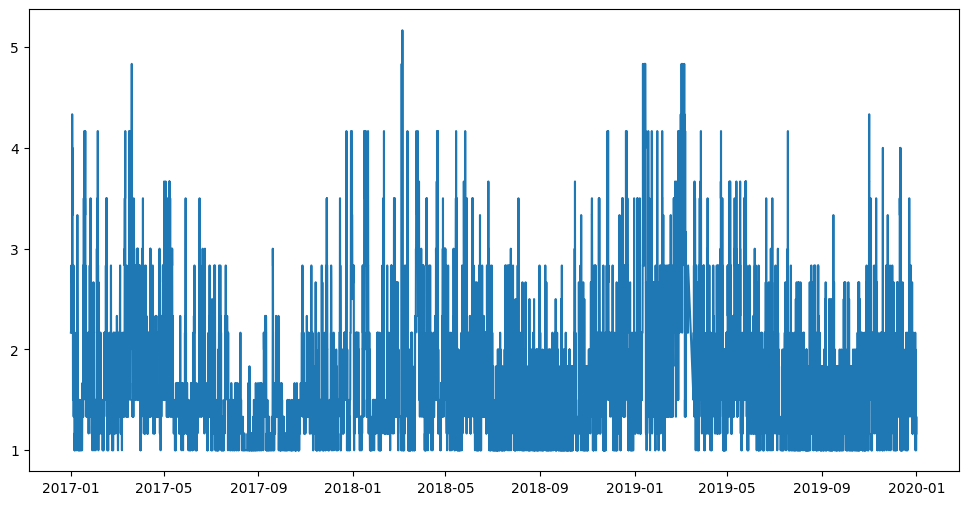

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(df_quality['date_hour'], df_quality['general_quality'], label='General Quality')

Text(0.5, 1.0, 'General Quality - 24 ore da 2017-01-01 20:00:00')

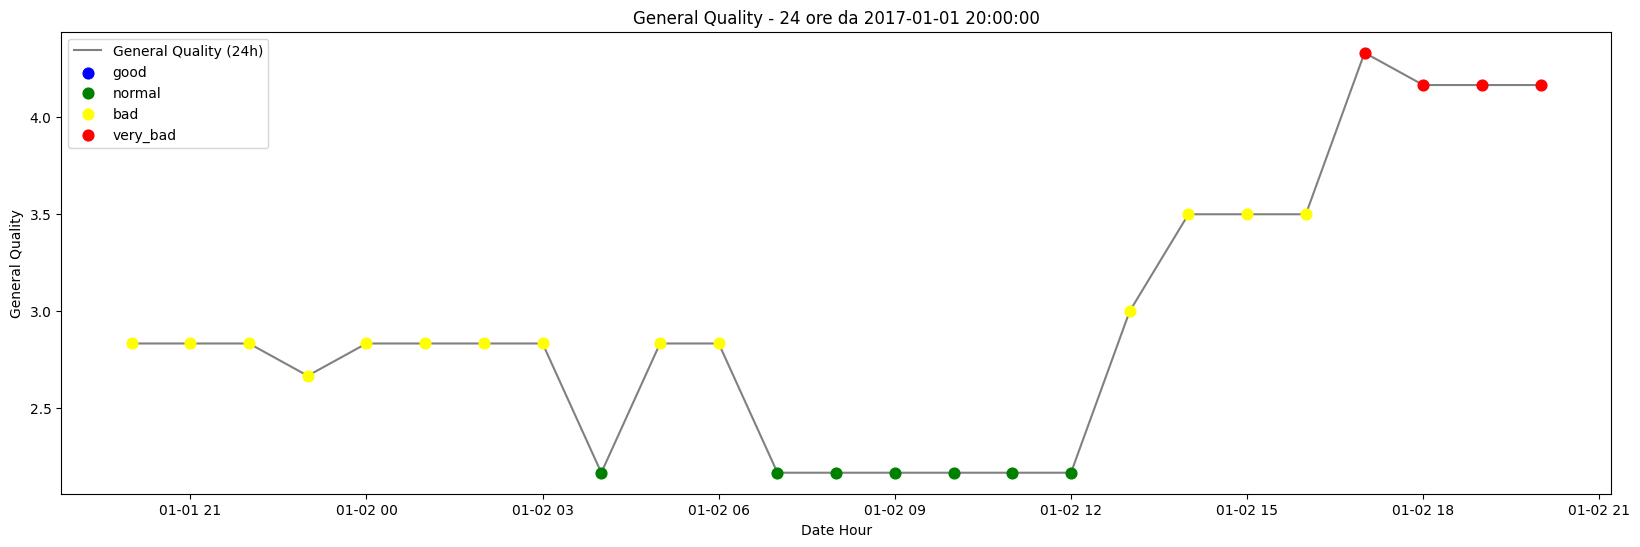

In [85]:
plt.figure(figsize=(20, 6))
# Seleziona solo le prime 24 ore
# Seleziona le 24 ore a partire da '2017-01-01 20:00:00'
start_time = pd.Timestamp('2017-01-01 20:00:00')
df_24h = df_quality[(df_quality['date_hour'] >= start_time)].iloc[:25]

# Linea generale in grigio
plt.plot(df_24h['date_hour'], df_24h['general_quality'], color='gray', label='General Quality (24h)')

# Mappa colori per le etichette
color_map = {
    'good': 'blue',
    'normal': 'green',
    'bad': 'yellow',
    'very_bad': 'red'
}

# Aggiungi i pallini colorati
for label, color in color_map.items():
    mask = df_24h['general_quality_label'] == label
    plt.scatter(df_24h.loc[mask, 'date_hour'], df_24h.loc[mask, 'general_quality'], color=color, label=label, s=60, zorder=3)

plt.legend()
plt.xlabel('Date Hour')
plt.ylabel('General Quality')
plt.title('General Quality - 24 ore da 2017-01-01 20:00:00')

# Features


In [86]:
df_quality.loc[:, 'val-1'] = df_quality['general_quality'].shift(1)
df_quality.loc[:, 'val-2'] = df_quality['general_quality'].shift(2)
df_quality.loc[:, 'val-3'] = df_quality['general_quality'].shift(3)

df_quality.head()

,date_hour,general_quality,general_quality_label,val-1,val-2,val-3
0,2017-01-01 00:00:00,2.166667,normal,NaN,NaN,NaN
1,2017-01-01 01:00:00,2.166667,normal,2.166667,NaN,NaN
2,2017-01-01 02:00:00,2.166667,normal,2.166667,2.166667,NaN
3,2017-01-01 03:00:00,2.166667,normal,2.166667,2.166667,2.166667
4,2017-01-01 04:00:00,2.166667,normal,2.166667,2.166667,2.166667


In [88]:

# fix NaN based on initial shifts
# either remove initial columns
df_quality = df_quality.iloc[3:,:]
# or bfill
#df = df.bfill()
df_quality.head()

,date_hour,general_quality,general_quality_label,val-1,val-2,val-3
3,2017-01-01 03:00:00,2.166667,normal,2.166667,2.166667,2.166667
4,2017-01-01 04:00:00,2.166667,normal,2.166667,2.166667,2.166667
5,2017-01-01 05:00:00,2.166667,normal,2.166667,2.166667,2.166667
6,2017-01-01 06:00:00,2.166667,normal,2.166667,2.166667,2.166667
7,2017-01-01 07:00:00,2.166667,normal,2.166667,2.166667,2.166667


# Forecasting as a Regression Problem

In [90]:
print('min time', df_quality['date_hour'].min())
print('max time', df_quality['date_hour'].max())
print(df_quality.shape)

min time 2017-01-01 03:00:00
max time 2019-12-31 23:00:00
(25903, 6)


In [91]:

# split between train and test
tt_split = datetime.strptime('2018-07-23 12:00:00','%Y-%m-%d %H:%M:%S')
train = df_quality[df_quality['date_hour'] <= tt_split]
test = df_quality[df_quality['date_hour'] > tt_split]
train.head(4)

,date_hour,general_quality,general_quality_label,val-1,val-2,val-3
3,2017-01-01 03:00:00,2.166667,normal,2.166667,2.166667,2.166667
4,2017-01-01 04:00:00,2.166667,normal,2.166667,2.166667,2.166667
5,2017-01-01 05:00:00,2.166667,normal,2.166667,2.166667,2.166667
6,2017-01-01 06:00:00,2.166667,normal,2.166667,2.166667,2.166667


# Linear models on lags, a.k.a. autoregression (AR model)

In [92]:
from sklearn.linear_model import LinearRegression

In [133]:
model = LinearRegression()
model.fit(train.loc[:, ['val-1', 'val-2', 'val-3']], train['general_quality'])

yp = model.predict(test.loc[:, ['val-1', 'val-2', 'val-3']])


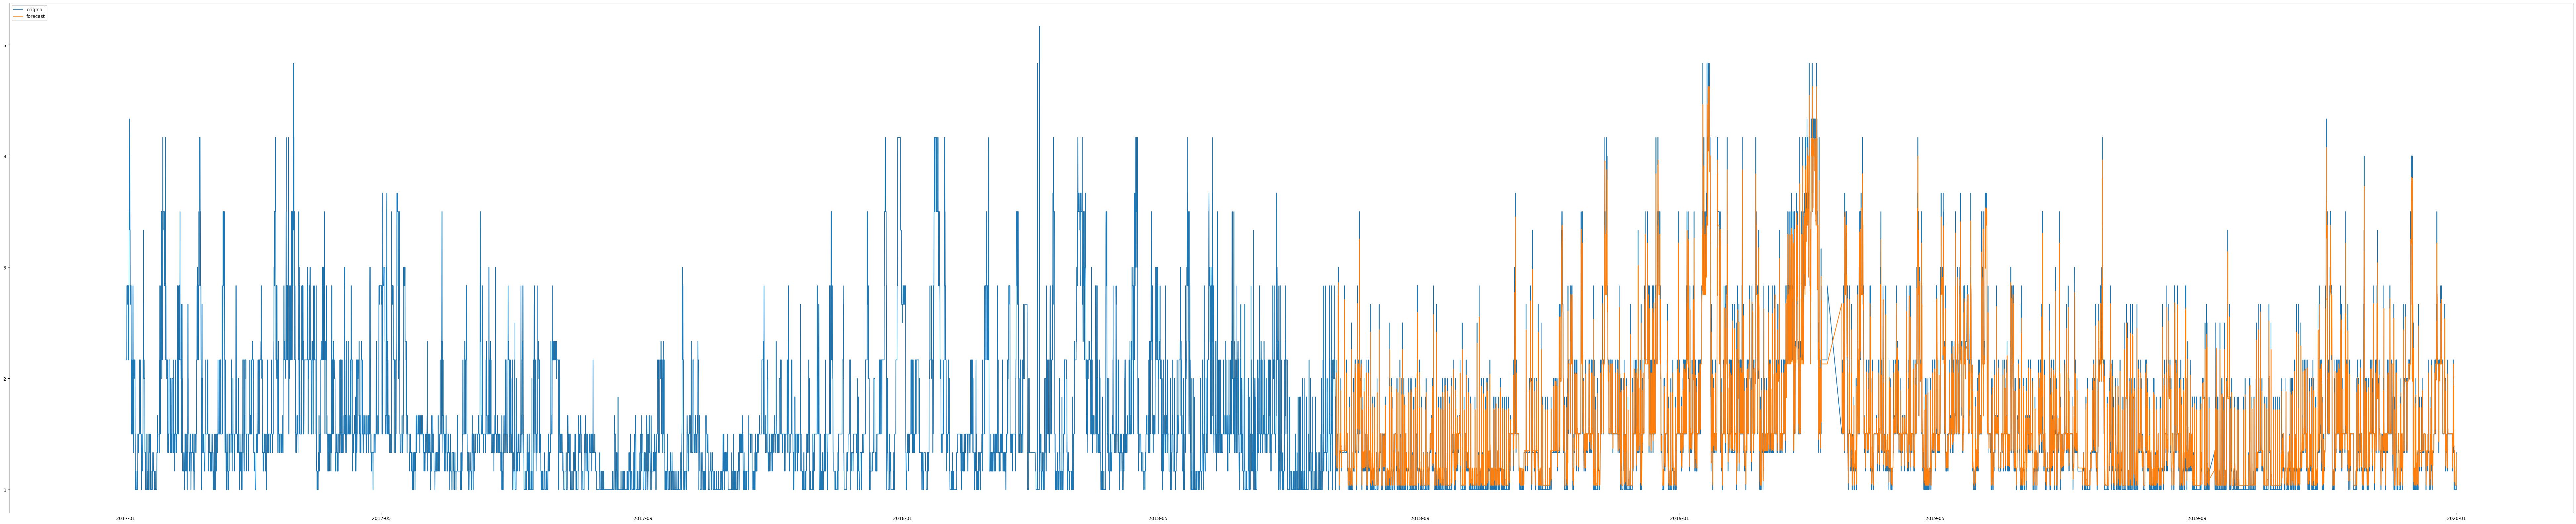

In [134]:
plt.figure(figsize = (100, 20))
plt.plot(df_quality['date_hour'],df_quality['general_quality'],label='original')
plt.plot(test['date_hour'],yp,label='forecast')
plt.legend(loc="upper left")
plt.show()

In [135]:
print('MAE = ',mean_absolute_error(test['general_quality'],yp))

MAE =  0.17341036932295228


In [142]:
# Seleziona le 24 ore di training
# Seleziona le 48 ore a partire da '2017-01-01 20:00:00'
start_time = pd.Timestamp('2017-01-01 20:00:00')
df_48h = df_quality[(df_quality['date_hour'] >= start_time) & (df_quality['date_hour'] < start_time + pd.Timedelta(hours=48))]

# Prime 24 ore per il train
train_24h = df_48h.iloc[:24]
# Ore 24-47 per il test
test_24h = df_48h.iloc[24:48]

# Addestra il modello sulle prime 24 ore
model1 = LinearRegression()
model1.fit(train_24h[['val-1', 'val-2', 'val-3']], train_24h['general_quality'])

# Previsione sulle 24 ore successive
yp = model1.predict(test_24h[['val-1', 'val-2', 'val-3']])

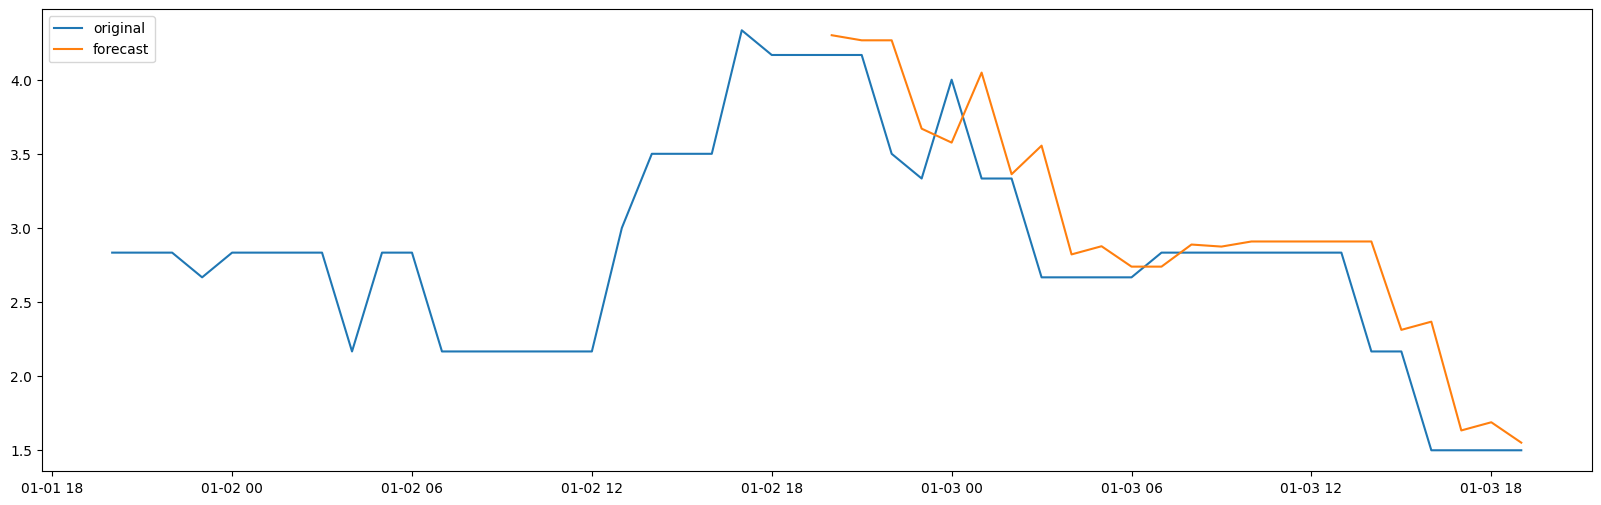

In [146]:
plt.figure(figsize = (20, 6))
plt.plot(df_48h['date_hour'],df_48h['general_quality'],label='original')
plt.plot(test_24h['date_hour'],yp,label='forecast')
plt.legend(loc="upper left")
plt.show()

In [147]:
print('MAE = ',mean_absolute_error(test_24h['general_quality'],yp))

MAE =  0.26863915623291695


In [166]:
from joblib import dump, load
dump(model, 'model.joblib') 
model = load('model.joblib') 



In [148]:
# Seleziona le 24 ore a partire da '2017-01-01 20:00:00'
start_time = pd.Timestamp('2017-01-01 20:00:00')
train_start = start_time
train_end = train_start + pd.Timedelta(hours=23)
test_start = train_end + pd.Timedelta(hours=1)
test_end = test_start + pd.Timedelta(hours=23)

# 24 ore di training
train_24h_2 = df_quality[(df_quality['date_hour'] >= train_start) & (df_quality['date_hour'] <= train_end)]
# 24 ore di test subito dopo
test_24h_2 = df_quality[(df_quality['date_hour'] >= test_start) & (df_quality['date_hour'] <= test_end)]

# Addestra il modello sulle prime 24 ore
model2 = LinearRegression()
model2.fit(train_24h_2[['val-1', 'val-2', 'val-3']], train_24h_2['general_quality'])

# Previsione sulle 24 ore successive
yp = model2.predict(test_24h_2[['val-1', 'val-2', 'val-3']])

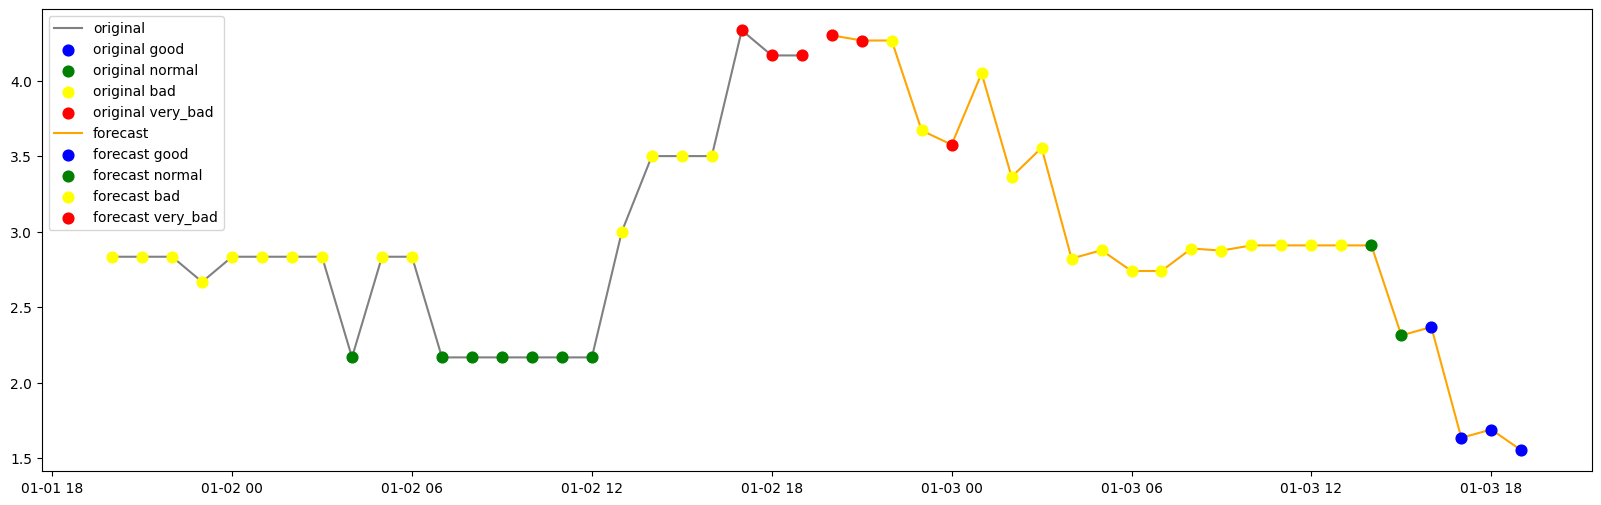

In [164]:
plt.figure(figsize = (20, 6))
plt.plot(train_24h_2['date_hour'], train_24h_2['general_quality'], color= 'grey', label='original')


color_map = {
    'good': 'blue',
    'normal': 'green',
    'bad': 'yellow',
    'very_bad': 'red'
}

# Pallini colorati per il train
for label, color in color_map.items():
    mask = train_24h_2['general_quality_label'] == label
    plt.scatter(train_24h_2.loc[mask, 'date_hour'], train_24h_2.loc[mask, 'general_quality'], color=color, label=f'original {label}', s=60, zorder=3)

plt.plot(test_24h_2['date_hour'], yp,color='orange', label='forecast')
# Pallini colorati per il test (forecast)
for label, color in color_map.items():
    mask = test_24h_2['general_quality_label'] == label
    plt.scatter(test_24h_2.loc[mask, 'date_hour'], yp[mask], color=color, label=f'forecast {label}', s=60, zorder=3)

plt.legend(loc="upper left")
plt.show()

In [152]:
print('MAE = ',mean_absolute_error(test_24h['general_quality'],yp))

MAE =  0.26863915623291695
